In [ ]:
from src.backtest.engine import Backtester
from src.backtest.benchmark import compare_to_buy_and_hold
from src.lib.data import DataFeed, DataFeedConfig
from src.strategies.sma import SMA 
from src.execution.simbroker import SimBroker, SimBrokerConfig

[*********************100%***********************]  1 of 1 completed
/home/nand/Documents/personal-projects/trading-algo/scripts/src/backtest/benchmark.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  base = float(close.iloc[0])


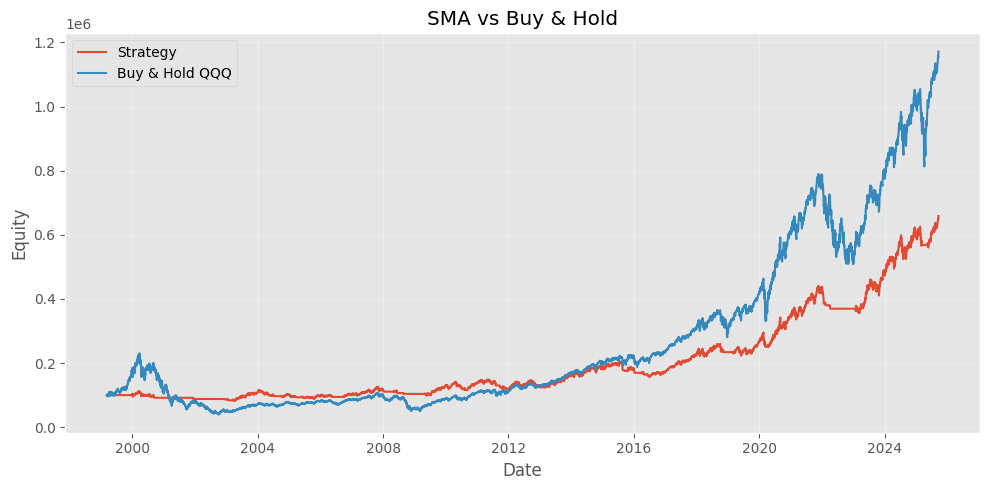

Strategy metrics: {'sharpe': 0.521807422205459, 'sortino': 0.7149372329382476, 'omega': 1.110801586463314, 'cagr': 0.07375381460592778, 'calmar': 0.2787488112551687, 'max_drawdown': -0.2645888040699589}
Benchmark metrics: {'sharpe': 0.3431679966646318, 'sortino': 0.4821244014605541, 'omega': 1.066503615256028, 'cagr': 0.09744369695201383, 'calmar': 0.11746463612284463, 'max_drawdown': -0.8295577304654237}


In [24]:
symbol = "QQQ"

feed = DataFeed(DataFeedConfig(
    symbols=[symbol], 
    start="1990-01-01"))


strat = SMA(
    vol_target_ann=0.20, 
    sma_window=200, 
    vol_window=15, 
    symbol=symbol)
    
broker = SimBroker(SimBrokerConfig(
    commission_per_order=0.50,  # dollars per order
    slippage_bps=15.0           # one-way bps added to price
))
bt = Backtester(
    feed, 
    strat, 
    broker=broker)

cmp = compare_to_buy_and_hold(
    bt, 
    symbol=symbol, 
    title="SMA vs Buy & Hold", 
    show=True,
    benchmark_commission=0.50,
    benchmark_slippage_bps=15.0,)

print("Strategy metrics:", cmp.strategy_metrics)
print("Benchmark metrics:", cmp.benchmark_metrics)